In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pygeotools.lib import iolib,geolib,malib,warplib
from imview import pltlib

In [4]:
! ls Distributed\ Mass\ Balances/Mass

ls: Distributed Mass Balances/Mass: No such file or directory


In [76]:
def plothist(ax, x, y, xlim, ylim, log=False,bin=30):
    bins = (bin, bin)
    #Generate and apply a common mask for the DEM and the elevation change arrays
    common_mask = ~(malib.common_mask([x,y]))
    x = x[common_mask]
    y = y[common_mask]
    H, xedges, yedges = np.histogram2d(x,y,range=[xlim,ylim],bins=bins)
    H = np.rot90(H)
    H = np.flipud(H)
    #Mask any bins with zero count
    Hmasked = np.ma.masked_where(H==0,H)
    H_clim = malib.calcperc(Hmasked, (5,95))
    
    if log:
        import matplotlib.colors as colors
        pcolormesh = ax.pcolormesh(xedges,yedges,Hmasked,cmap='inferno',norm=colors.LogNorm(vmin=H_clim[0],vmax=H_clim[1]))
    else:
        pcolormesh = ax.pcolormesh(xedges,yedges,Hmasked,cmap='inferno',vmin=H_clim[0],vmax=H_clim[1])
    pltlib.add_cbar(ax,pcolormesh,label='# of pixels')
    #Plot a line for the max values in each elevation band
    Hmax_idx = np.ma.argmax(Hmasked, axis=0)
    ymax = (yedges[:-1]+np.diff(yedges))[Hmax_idx]

## 2016 snow depth, 2017 firn compaction

In [91]:
firn_2017_fn = '/Users/shashank/Downloads/Wolverine Glacier Distributed Mass Balances/Firn Compaction/Distributed/2017_distributed_firn_lowering.tif'
smb_2016_winter_fn = '/Users/shashank/Downloads/Wolverine Glacier Distributed Mass Balances/Distributed Mass Balances/Mass Balance - GPR emergence/16W_balance_gpr.tif'
smb_2016_annual_fn = '/Users/shashank/Downloads/Wolverine Glacier Distributed Mass Balances/Distributed Mass Balances/Mass Balance - GPR emergence/16A_balance_gpr.tif'

In [93]:
ds_list = warplib.memwarp_multi_fn([firn_2017_fn,smb_2016_winter_fn,smb_2016_annual_fn])
firn_ma, smb_winter_ma, smb_annual_ma = [np.ma.fix_invalid(iolib.ds_getma(ds)) for ds in ds_list]



Warping all inputs to the following:
Resolution: 10.0
Extent: [392497.61487807217, 6694896.36420856, 397657.61487807217, 6701456.36420856]
Projection: '+proj=utm +zone=6 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 3: /Users/shashank/Downloads/Wolverine Glacier Distributed Mass Balances/Firn Compaction/Distributed/2017_distributed_firn_lowering.tif
2 of 3: /Users/shashank/Downloads/Wolverine Glacier Distributed Mass Balances/Distributed Mass Balances/Mass Balance - GPR emergence/16W_balance_gpr.tif
3 of 3: /Users/shashank/Downloads/Wolverine Glacier Distributed Mass Balances/Distributed Mass Balances/Mass Balance - GPR emergence/16A_balance_gpr.tif


<Axes: >

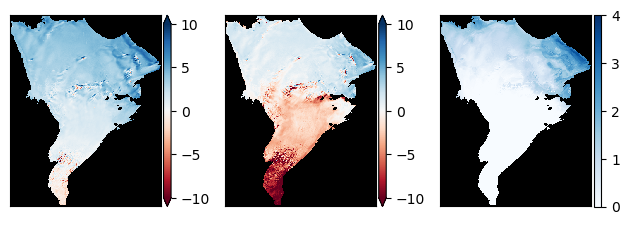

In [94]:
f,ax = plt.subplots(1,3)
pltlib.iv(smb_winter_ma,ax=ax[0],cmap='RdBu',clim=(-10,10))
pltlib.iv(smb_annual_ma,ax=ax[1],cmap='RdBu',clim=(-10,10))
pltlib.iv(firn_ma,ax=ax[2],cmap='Blues',clim=(0,4))

In [95]:
firn_mask = np.ma.masked_less_equal(firn_ma,0)
smb_snow_winter = np.ma.array(smb_winter_ma,mask=firn_mask.mask)
smb_snow_annual = np.ma.array(smb_annual_ma,mask=firn_mask.mask)

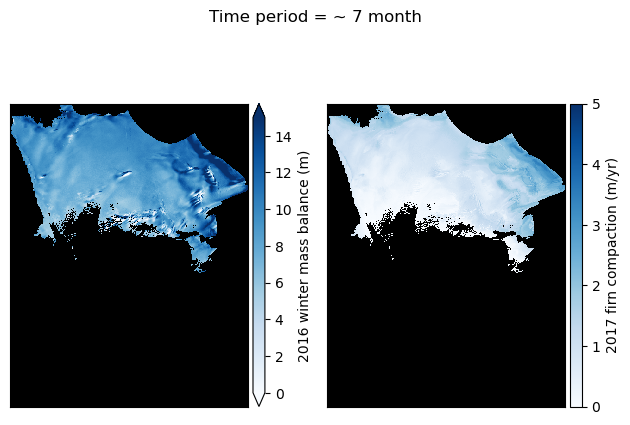

In [110]:
f,ax = plt.subplots(1,2)
pltlib.iv(smb_snow_winter/0.44,ax=ax[0],cmap='Blues',clim=(0,15),label='2016 winter mass balance (m)')
pltlib.iv(firn_mask,ax=ax[1],cmap='Blues',clim=(0,5),label='2017 firn compaction (m/yr)')
plt.suptitle('Time period = ~ 7 month')
plt.tight_layout()

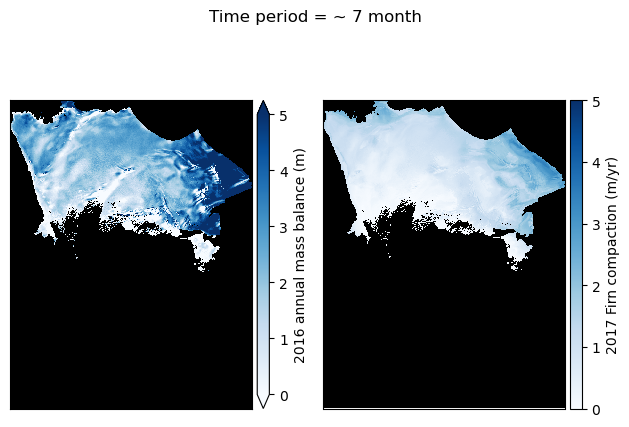

In [112]:
f,ax = plt.subplots(1,2)
pltlib.iv(smb_snow_annual/0.60,ax=ax[0],cmap='Blues',clim=(0,5),label='2016 annual mass balance (m)')
pltlib.iv(firn_mask,ax=ax[1],cmap='Blues',clim=(0,5),label='2017 Firn compaction (m/yr)')
plt.suptitle('Time period = ~ 7 month')
plt.tight_layout()

Text(0, 0.5, '2017 Annual Firn compaction (m/yr)')

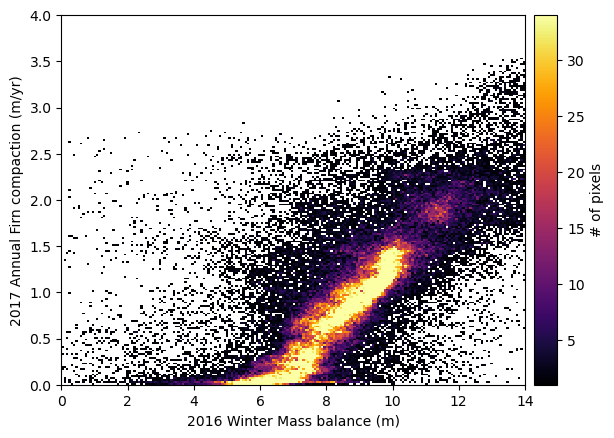

In [107]:
f,ax = plt.subplots()
plothist(ax,smb_snow/0.44,firn_mask,xlim=(0,14),ylim=(0,4),bin=200)
ax.set_xlabel('2016 Winter Mass balance (m)')
ax.set_ylabel('2017 Annual Firn compaction (m/yr)')

In [103]:
7 * 30

210

Text(0, 0.5, '2017 annaul firn compaction (m/yr)')

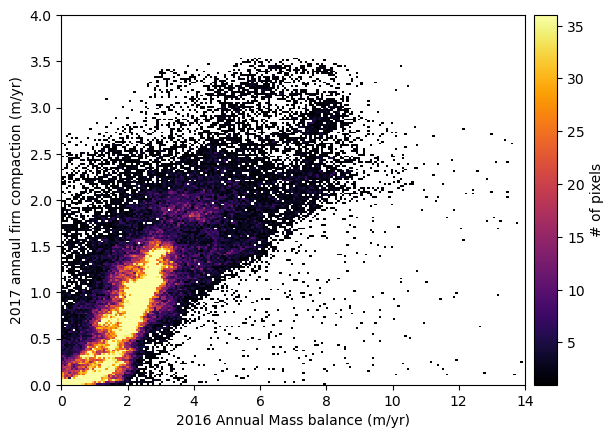

In [108]:
f,ax = plt.subplots()
plothist(ax,smb_snow_annual/0.6,firn_mask,xlim=(0,14),ylim=(0,4),bin=200)
ax.set_xlabel('2016 Annual Mass balance (m/yr)')
ax.set_ylabel('2017 annaul firn compaction (m/yr)')

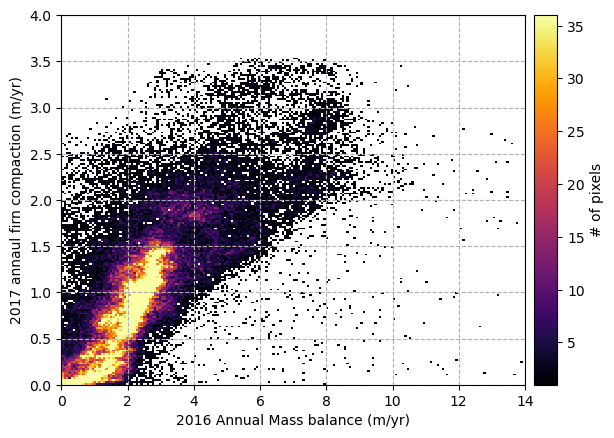

In [109]:
f,ax = plt.subplots()
plothist(ax,smb_snow_annual/0.6,firn_mask,xlim=(0,14),ylim=(0,4),bin=200)
ax.set_xlabel('2016 Annual Mass balance (m/yr)')
ax.set_ylabel('2017 annaul firn compaction (m/yr)')
ax.grid(linestyle='--')